In [38]:
import pandas as pd
import numpy as np

In [39]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone','Microphone','Keyboard'],n)
prices = np.round(np.random.uniform(50.0, 200.0, n),2)
quantities = np.random.randint(1,15,n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}

data

{'Date': DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-03', '2050-01-04',
                '2050-01-05', '2050-01-06', '2050-01-07', '2050-01-08',
                '2050-01-09', '2050-01-10', '2050-01-11', '2050-01-12',
                '2050-01-13', '2050-01-14', '2050-01-15', '2050-01-16',
                '2050-01-17', '2050-01-18', '2050-01-19', '2050-01-20',
                '2050-01-21', '2050-01-22', '2050-01-23', '2050-01-24',
                '2050-01-25', '2050-01-26', '2050-01-27', '2050-01-28',
                '2050-01-29', '2050-01-30', '2050-01-31', '2050-02-01',
                '2050-02-02', '2050-02-03', '2050-02-04', '2050-02-05',
                '2050-02-06', '2050-02-07', '2050-02-08', '2050-02-09',
                '2050-02-10', '2050-02-11', '2050-02-12', '2050-02-13',
                '2050-02-14', '2050-02-15', '2050-02-16', '2050-02-17',
                '2050-02-18', '2050-02-19', '2050-02-20', '2050-02-21',
                '2050-02-22', '2050-02-23', '2050-02-24'

In [40]:
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [41]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [42]:
df.to_csv('random_sales.csv', index=False) # index=False - сохранение без индекса

In [43]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date']) # parse_dates=['Date']  -парсит принудительно в формат date time (в этом случае)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [44]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [45]:
df.to_excel('sales.xlsx')

In [46]:
df.to_json('sales.json')

In [47]:
df.shape

(100, 4)

In [48]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [54]:
product_sales = df.groupby('Product')['Quantity'].sum() # считает сумма то колонке Product, значение берется из колонки Quantity
product_sales

Product
Camera        186
Keyboard      173
Microphone    106
Phone         124
Tablet        190
Name: Quantity, dtype: int64

In [69]:
average_prices = df.groupby('Product')['Price'].mean() 
average_prices

Product
Camera        121.536250
Keyboard      115.610435
Microphone    129.428824
Phone         123.471333
Tablet        100.172857
Name: Price, dtype: float64

In [51]:
df.groupby('Product')['Price'].count() 

Product
Camera        24
Keyboard      23
Microphone    17
Phone         15
Tablet        21
Name: Price, dtype: int64

In [59]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


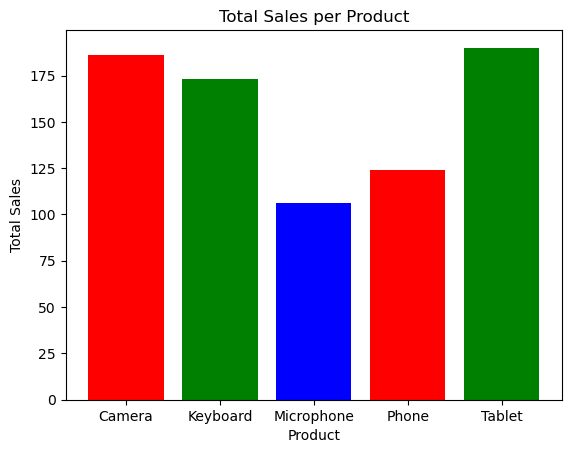

In [66]:
plt.bar(product_sales.index, product_sales.values, color =['red','green','blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

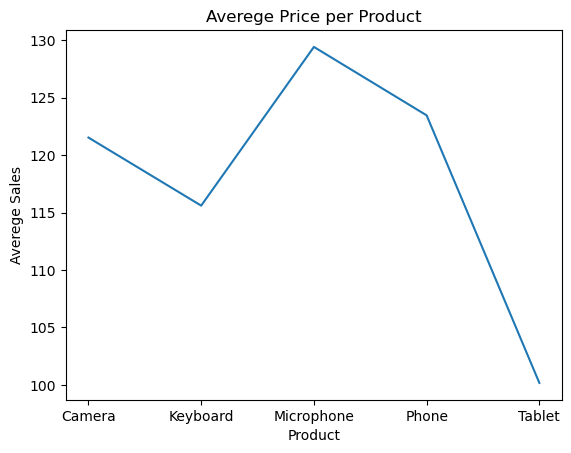

In [71]:
plt.plot(average_prices.index,average_prices.values)
plt.title('Averege Price per Product')
plt.xlabel('Product')
plt.ylabel('Averege Sales')
plt.show()